# Obtenção da repetição origem-destino com grids de 100m, agora com todas as áreas da parte rural de Ann Arbor

In [ ]:
import skmob
from skmob.utils import utils, constants
from skmob.tessellation import tilers
from skmob.utils.plot import plot_gdf

import numpy as np
import pandas as pd
import geopandas as gpd
import shapely
import folium
from folium.plugins import HeatMap
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1) Filtrar pelo id do veículo e concatenar em um único DataFrame

In [ ]:
import pandas as pd
import glob
import numpy as np
files = glob.glob(r"C:\Users\firmi\OneDrive\Documentos\ved_descompactados\*.csv")

df = pd.DataFrame()
for f in files:
    plt = pd.read_csv(f, sep = ",")
    df = pd.concat([plt,df], ignore_index=False)
    df = df.loc[(df['VehId'] == 531)]

df

,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Air Conditioning Power[kW],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery Current[A],HV Battery SOC[%],HV Battery Voltage[V],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
80490,373.896622,531,3093,0,42.264132,-83.750104,37.0,13.840000,1735.0,53.725491,...,NaN,NaN,NaN,NaN,NaN,NaN,4.6875,NaN,4.6875,NaN
80491,373.896622,531,3093,100,42.264132,-83.750104,39.0,13.840000,1735.0,53.725491,...,NaN,NaN,NaN,NaN,NaN,NaN,4.6875,NaN,4.6875,NaN
80492,373.896622,531,3093,700,42.264132,-83.750104,39.0,13.840000,1924.0,53.725491,...,NaN,NaN,NaN,NaN,NaN,NaN,4.6875,NaN,4.6875,NaN
80493,373.896622,531,3093,800,42.264132,-83.750104,39.0,21.789999,1924.0,53.725491,...,NaN,NaN,NaN,NaN,NaN,NaN,4.6875,NaN,4.6875,NaN
80494,373.896622,531,3093,1100,42.264132,-83.750104,46.0,21.789999,1924.0,53.725491,...,NaN,NaN,NaN,NaN,NaN,NaN,4.6875,NaN,4.6875,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477061,7.794458,531,629,462100,42.243008,-83.766877,57.0,2.790000,1347.0,14.117647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477062,7.794458,531,629,463200,42.243008,-83.766877,55.0,3.910000,1030.0,14.117647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477063,7.794458,531,629,464200,42.243008,-83.766877,53.0,3.910000,1030.0,14.117647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477064,7.794458,531,629,465200,42.243008,-83.766877,52.0,3.910000,1030.0,14.117647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2) Ordernar pelas colunas do trip_id pelo Timestamp

In [ ]:
df = df.sort_values(by=['Trip','Timestamp(ms)'])


df

,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Air Conditioning Power[kW],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery Current[A],HV Battery SOC[%],HV Battery Voltage[V],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
125293,2.519458,531,597,0,42.282583,-83.748447,35.0,12.24,1784.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125294,2.519458,531,597,1100,42.282583,-83.748447,36.0,12.46,1680.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125295,2.519458,531,597,2100,42.282583,-83.748447,38.0,12.46,1680.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125296,2.519458,531,597,3100,42.282583,-83.748447,38.0,3.36,1686.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125297,2.519458,531,597,4200,42.282583,-83.748447,37.0,3.36,1686.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118322,375.501195,531,3100,531600,42.244478,-83.729825,0.0,3.42,797.0,28.627451,...,NaN,NaN,NaN,NaN,NaN,NaN,3.12500,NaN,7.03125,NaN
118323,375.501195,531,3100,533600,42.244478,-83.729825,0.0,3.42,801.0,28.627451,...,NaN,NaN,NaN,NaN,NaN,NaN,3.12500,NaN,7.03125,NaN
118324,375.501195,531,3100,534900,42.244478,-83.729825,0.0,3.33,801.0,28.627451,...,NaN,NaN,NaN,NaN,NaN,NaN,3.12500,NaN,7.03125,NaN
118325,375.501195,531,3100,535300,42.244478,-83.729825,0.0,3.33,801.0,28.627451,...,NaN,NaN,NaN,NaN,NaN,NaN,3.90625,NaN,7.03125,NaN


## 1.1) Analisar todos os arquivos de trajetórias

In [ ]:
df['Trip'].nunique()

478

In [ ]:
#df['VehId'].nunique()

In [ ]:
df['Trip'].unique()

array([ 597,  599,  605,  612,  613,  617,  619,  627,  629,  638,  641,
        658,  673,  677,  681,  683,  690,  693,  695,  697,  702,  703,
        705,  708,  722,  724,  733,  734,  742,  746,  750,  752,  756,
        757,  758,  759,  763,  772,  773,  781,  782,  786,  791,  800,
        817,  818,  828,  830,  836,  846,  848,  851,  861,  863,  873,
        883,  886,  889,  893,  914,  928,  933,  935,  940,  946,  952,
        967,  975,  978,  979,  981,  983,  994,  995,  998, 1010, 1019,
       1020, 1026, 1032, 1034, 1044, 1045, 1053, 1054, 1058, 1065, 1070,
       1075, 1076, 1077, 1082, 1083, 1084, 1098, 1100, 1110, 1111, 1118,
       1122, 1125, 1142, 1143, 1145, 1152, 1153, 1161, 1163, 1165, 1172,
       1178, 1185, 1190, 1194, 1197, 1202, 1204, 1205, 1209, 1217, 1227,
       1231, 1234, 1242, 1244, 1245, 1247, 1261, 1264, 1269, 1270, 1272,
       1275, 1276, 1278, 1284, 1287, 1289, 1299, 1302, 1305, 1314, 1321,
       1331, 1335, 1338, 1339, 1344, 1349, 1354, 13

In [ ]:
#df['VehId'].unique()

## Obs.: antes de prosseguir, determino o datetime

In [ ]:
#df = df.sort_values(by='DayNum')

df['datetime'] = pd.to_datetime(df['DayNum'], unit='D', origin=pd.Timestamp('2017-11-01'))


print(df['datetime'].min())

print(df['datetime'].max())


print(df['DayNum'].min())

print(df['DayNum'].max())

print(df.shape)

2017-11-03 12:28:01.188800512
2018-11-11 12:01:43.223980800
2.51945820371
375.501194722
(381876, 23)


In [ ]:
t = pd.DataFrame()

t = pd.date_range(start='2017-11-03 12:28:01.188800512', end='2018-11-11 12:01:43.223980800', periods=381876)


df['datetime'] = t

df.datetime

125293   2017-11-03 12:28:01.188800512
125294   2017-11-03 12:29:25.576681455
125295   2017-11-03 12:30:49.964562398
125296   2017-11-03 12:32:14.352443341
125297   2017-11-03 12:33:38.740324284
                      ...             
118322   2018-11-11 11:56:05.672457024
118323   2018-11-11 11:57:30.060337968
118324   2018-11-11 11:58:54.448218912
118325   2018-11-11 12:00:18.836099856
118326   2018-11-11 12:01:43.223980800
Name: datetime, Length: 381876, dtype: datetime64[ns]

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime']).round('s')

df.datetime

125293   2017-11-03 12:28:01
125294   2017-11-03 12:29:26
125295   2017-11-03 12:30:50
125296   2017-11-03 12:32:14
125297   2017-11-03 12:33:39
                 ...        
118322   2018-11-11 11:56:06
118323   2018-11-11 11:57:30
118324   2018-11-11 11:58:54
118325   2018-11-11 12:00:19
118326   2018-11-11 12:01:43
Name: datetime, Length: 381876, dtype: datetime64[ns]

## 3) Criação da malha de grids por 100 m2

In [ ]:
import pandas as pd
import geopandas as gpd

#vei8 = df

In [ ]:
from skmob.tessellation import tilers
from skmob.preprocessing import filtering

In [ ]:
#import pandas as pd
import skmob
#import geopandas as gpd
from skmob import preprocessing

<Axes: >

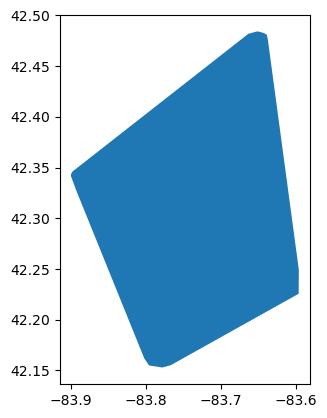

In [ ]:
tessellation = gpd.read_file('limite_geral_tess.gpkg')

tessellation = tessellation.to_crs('EPSG:4326')

tessellation.plot()

In [ ]:
tessellation

,id,area,perimeter,geometry
0,0,0.062761,0.988398,"POLYGON ((-83.77837 42.15297, -83.79607 42.154..."


In [ ]:
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=gpd.points_from_xy(df["Longitude[deg]"], df["Latitude[deg]"]))

gdf

,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Heater Power[Watts],HV Battery Current[A],HV Battery SOC[%],HV Battery Voltage[V],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%],datetime,geometry
125293,2.519458,531,597,0,42.282583,-83.748447,35.0,12.24,1784.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-03 12:28:01,POINT (-83.74845 42.28258)
125294,2.519458,531,597,1100,42.282583,-83.748447,36.0,12.46,1680.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-03 12:29:26,POINT (-83.74845 42.28258)
125295,2.519458,531,597,2100,42.282583,-83.748447,38.0,12.46,1680.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-03 12:30:50,POINT (-83.74845 42.28258)
125296,2.519458,531,597,3100,42.282583,-83.748447,38.0,3.36,1686.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-03 12:32:14,POINT (-83.74845 42.28258)
125297,2.519458,531,597,4200,42.282583,-83.748447,37.0,3.36,1686.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-03 12:33:39,POINT (-83.74845 42.28258)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118322,375.501195,531,3100,531600,42.244478,-83.729825,0.0,3.42,797.0,28.627451,...,NaN,NaN,NaN,NaN,3.12500,NaN,7.03125,NaN,2018-11-11 11:56:06,POINT (-83.72983 42.24448)
118323,375.501195,531,3100,533600,42.244478,-83.729825,0.0,3.42,801.0,28.627451,...,NaN,NaN,NaN,NaN,3.12500,NaN,7.03125,NaN,2018-11-11 11:57:30,POINT (-83.72983 42.24448)
118324,375.501195,531,3100,534900,42.244478,-83.729825,0.0,3.33,801.0,28.627451,...,NaN,NaN,NaN,NaN,3.12500,NaN,7.03125,NaN,2018-11-11 11:58:54,POINT (-83.72983 42.24448)
118325,375.501195,531,3100,535300,42.244478,-83.729825,0.0,3.33,801.0,28.627451,...,NaN,NaN,NaN,NaN,3.90625,NaN,7.03125,NaN,2018-11-11 12:00:19,POINT (-83.72983 42.24448)


In [ ]:
from skmob.tessellation import tilers

tessellation = tilers.tiler.get("squared",
                                base_shape=tessellation,
                                meters=100)

tessellation

C:\Users\firmi\miniforge3\envs\mpd-ex\lib\site-packages\skmob\tessellation\tilers.py:117: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  base_shape = gpd.GeoSeries(cascaded_union(polygons), crs=base_shape.crs)


,tile_ID,geometry
0,0,"POLYGON ((-83.90017 42.33917, -83.90017 42.339..."
1,1,"POLYGON ((-83.90017 42.33983, -83.90017 42.340..."
2,2,"POLYGON ((-83.90017 42.34049, -83.90017 42.341..."
3,3,"POLYGON ((-83.90017 42.34116, -83.90017 42.341..."
4,4,"POLYGON ((-83.90017 42.34182, -83.90017 42.342..."
...,...,...
106008,106008,"POLYGON ((-83.59654 42.24680, -83.59654 42.247..."
106009,106009,"POLYGON ((-83.59654 42.24747, -83.59654 42.248..."
106010,106010,"POLYGON ((-83.59654 42.24813, -83.59654 42.248..."
106011,106011,"POLYGON ((-83.59654 42.24880, -83.59654 42.249..."


In [ ]:
# tessellation.to_file('tessellation100.gpkg', driver='GPKG')

In [ ]:
#tdf.columns

In [ ]:
#fdf = tdf.to_flowdataframe(tessellation=tessellation, self_loops=False)

#print(fdf.head())

In [ ]:
import geopandas as gpd
from geopandas.tools import sjoin

mtdf = sjoin(gdf, tessellation, how='inner', op='within')

mtdf

,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,HV Battery SOC[%],HV Battery Voltage[V],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%],datetime,geometry,index_right,tile_ID
125293,2.519458,531,597,0,42.282583,-83.748447,35.0,12.24,1784.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-03 12:28:01,POINT (-83.74845 42.28258),43791,43791
125294,2.519458,531,597,1100,42.282583,-83.748447,36.0,12.46,1680.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-03 12:29:26,POINT (-83.74845 42.28258),43791,43791
125295,2.519458,531,597,2100,42.282583,-83.748447,38.0,12.46,1680.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-03 12:30:50,POINT (-83.74845 42.28258),43791,43791
125296,2.519458,531,597,3100,42.282583,-83.748447,38.0,3.36,1686.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-03 12:32:14,POINT (-83.74845 42.28258),43791,43791
125297,2.519458,531,597,4200,42.282583,-83.748447,37.0,3.36,1686.0,49.019608,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-03 12:33:39,POINT (-83.74845 42.28258),43791,43791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329735,370.598223,531,3067,145900,42.264351,-83.756964,34.0,3.76,1752.0,23.921570,...,NaN,NaN,0.0,NaN,0.78125,NaN,2018-11-06 08:40:54,POINT (-83.75696 42.26435),40109,40109
329736,370.598223,531,3067,146000,42.264302,-83.757307,34.0,3.76,1752.0,23.921570,...,NaN,NaN,0.0,NaN,0.78125,NaN,2018-11-06 08:42:19,POINT (-83.75731 42.26430),40109,40109
329737,370.598223,531,3067,147700,42.264302,-83.757307,32.0,3.76,1752.0,23.921570,...,NaN,NaN,0.0,NaN,0.78125,NaN,2018-11-06 08:43:43,POINT (-83.75731 42.26430),40109,40109
329738,370.598223,531,3067,147800,42.264302,-83.757307,32.0,3.76,1752.0,27.058825,...,NaN,NaN,0.0,NaN,0.78125,NaN,2018-11-06 08:45:07,POINT (-83.75731 42.26430),40109,40109


## 4) Posições iniciais e finais para cada Trip

In [ ]:
import movingpandas as mpd

#### Obs.: se houver apenas 1 Trip, usar Timestamp(ms) no lugar do datetime.

In [ ]:
traj = mpd.TrajectoryCollection(mtdf, traj_id_col='Trip', obj_id_col='VehId', t='datetime', x='lng', y='lat', crs='epsg:4326')
traj

TrajectoryCollection with 478 trajectories

In [ ]:
# traj.plot(column='speed', legend=True, figsize=(9,5))

In [ ]:
start = traj.get_start_locations()
end = traj.get_end_locations()

In [ ]:

start['lon'] = start.geometry.x
start['lat'] = start.geometry.y

In [ ]:

end['lon'] = end.geometry.x
end['lat'] = end.geometry.y

<Axes: >

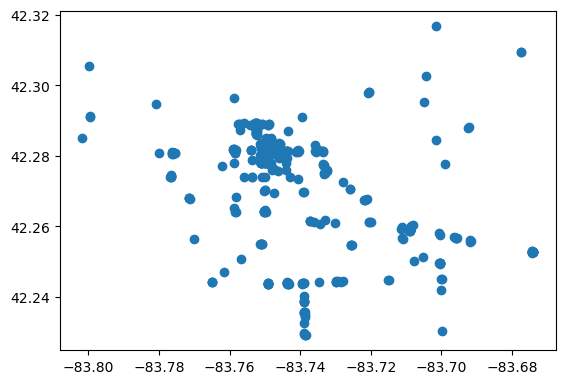

In [ ]:
start.plot()

<Axes: >

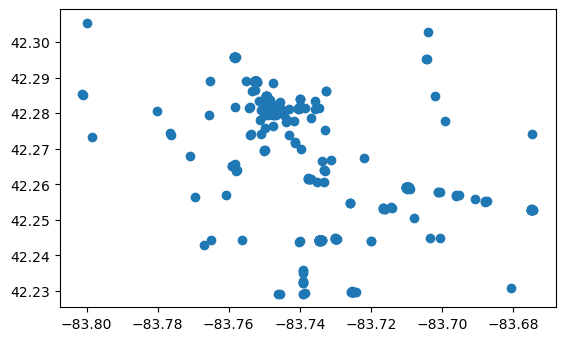

In [ ]:
end.plot()

In [ ]:
start['direção'] = 'Origem'
end['direção'] = 'Destino'



## 5) Tabela com os pontos iniciais, finais e o id da trajetória

In [ ]:
pontos = start.merge(end, on='Trip')

pontos

,datetime_x,DayNum_x,VehId_x,Trip,Timestamp(ms)_x,Latitude[deg]_x,Longitude[deg]_x,Vehicle Speed[km/h]_x,MAF[g/sec]_x,Engine RPM[RPM]_x,...,Short Term Fuel Trim Bank 1[%]_y,Short Term Fuel Trim Bank 2[%]_y,Long Term Fuel Trim Bank 1[%]_y,Long Term Fuel Trim Bank 2[%]_y,geometry_y,index_right_y,tile_ID_y,lon_y,lat_y,direção_y
0,2017-11-03 12:28:01,2.519458,531,597,0,42.282583,-83.748447,35.0,12.24,1784.0,...,NaN,NaN,NaN,NaN,POINT (-83.73999 42.28397),47876,47876,-83.739995,42.283971,Destino
1,2017-11-03 22:41:14,2.86113,531,599,0,42.274043,-83.753559,46.0,22.129999,2100.0,...,NaN,NaN,NaN,NaN,POINT (-83.79853 42.27329),22001,22001,-83.798532,42.273291,Destino
2,2017-11-04 12:24:01,3.462884,531,605,0,42.267376,-83.721659,71.0,16.17,1779.0,...,NaN,NaN,NaN,NaN,POINT (-83.70992 42.25902),61474,61474,-83.709920,42.259024,Destino
3,2017-11-04 15:18:25,4.456382,531,612,0,42.282268,-83.748643,42.0,3.55,1158.0,...,NaN,NaN,NaN,NaN,POINT (-83.70996 42.25917),61474,61474,-83.709965,42.259174,Destino
4,2017-11-05 03:39:38,4.498413,531,613,0,42.272556,-83.727958,25.0,28.559999,2601.0,...,NaN,NaN,NaN,NaN,POINT (-83.75241 42.28877),42174,42174,-83.752412,42.288774,Destino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,2018-11-06 02:12:43,370.598223,531,3067,0,42.261484,-83.737355,28.0,3.27,1417.0,...,14.84375,NaN,-1.5625,NaN,POINT (-83.75240 42.28874),42174,42174,-83.752399,42.288741,Destino
474,2018-11-07 01:26:32,371.797964,531,3075,0,42.259091,-83.708995,32.0,23.279999,3010.0,...,0.0,NaN,7.03125,NaN,POINT (-83.74976 42.28313),43385,43385,-83.749758,42.283132,Destino
475,2018-11-08 11:44:11,373.896622,531,3093,0,42.264132,-83.750104,37.0,13.84,1735.0,...,6.25,NaN,3.90625,NaN,POINT (-83.74963 42.28219),43384,43384,-83.749627,42.282194,Destino
476,2018-11-09 02:14:47,373.937131,531,3095,0,42.289005,-83.7525,30.0,13.92,1934.0,...,0.0,NaN,5.46875,NaN,POINT (-83.70968 42.25915),61891,61891,-83.709676,42.259146,Destino


## 6) Tabela com os grids de origem e de destino

In [ ]:
pontos.columns

Index(['datetime_x', 'DayNum_x', 'VehId_x', 'Trip', 'Timestamp(ms)_x',
       'Latitude[deg]_x', 'Longitude[deg]_x', 'Vehicle Speed[km/h]_x',
       'MAF[g/sec]_x', 'Engine RPM[RPM]_x', 'Absolute Load[%]_x',
       'OAT[DegC]_x', 'Fuel Rate[L/hr]_x', 'Air Conditioning Power[kW]_x',
       'Air Conditioning Power[Watts]_x', 'Heater Power[Watts]_x',
       'HV Battery Current[A]_x', 'HV Battery SOC[%]_x',
       'HV Battery Voltage[V]_x', 'Short Term Fuel Trim Bank 1[%]_x',
       'Short Term Fuel Trim Bank 2[%]_x', 'Long Term Fuel Trim Bank 1[%]_x',
       'Long Term Fuel Trim Bank 2[%]_x', 'geometry_x', 'index_right_x',
       'tile_ID_x', 'lon_x', 'lat_x', 'direção_x', 'datetime_y', 'DayNum_y',
       'VehId_y', 'Timestamp(ms)_y', 'Latitude[deg]_y', 'Longitude[deg]_y',
       'Vehicle Speed[km/h]_y', 'MAF[g/sec]_y', 'Engine RPM[RPM]_y',
       'Absolute Load[%]_y', 'OAT[DegC]_y', 'Fuel Rate[L/hr]_y',
       'Air Conditioning Power[kW]_y', 'Air Conditioning Power[Watts]_y',
       'Hea

In [ ]:
#mtdf = mtdf[['uid', 'direção', 'tile_ID', 'lon', 'lat']]

#mtdf.rename({'uid':'veículo_id', 'tile_ID':'grid'}, axis=1, inplace=True)
pontos = pontos[['VehId_x', 'Trip', 'direção_x','direção_y', 'tile_ID_x','tile_ID_y','lon_x','lat_x','lon_y','lat_y']]

pontos.rename({ 'direção_x':'Origens','direção_y':'Destinos', 'tile_ID_x':'grid_origem','tile_ID_y':'grid_destino'}, axis=1, inplace=True)


C:\Users\firmi\miniforge3\envs\mpd-ex\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## 7) Somatório e análise

#### Primeiro, faço uma exploração por partes:

In [ ]:
A = pd.DataFrame()

A['repetições'] = pontos.groupby(['grid_origem']).size().reset_index().groupby(['grid_origem']).sum()

A.shape

(193, 1)

In [ ]:
B = pd.DataFrame()

B['repetições'] = pontos.groupby(['grid_destino']).size().reset_index().groupby(['grid_destino']).sum()

B.shape

(130, 1)

In [ ]:
A.reset_index()

,grid_origem,repetições
0,20542,1
1,21285,2
2,21307,1
3,29339,1
4,29711,1
...,...,...
188,69901,1
189,70273,1
190,76705,2
191,78321,10


In [ ]:
A['repetições'].sum()

478

In [ ]:
A['repetições'].max()

40

In [ ]:
B.reset_index()

,grid_destino,repetições
0,20908,2
1,21307,1
2,22001,1
3,29711,1
4,31283,1
...,...,...
125,75312,1
126,77895,2
127,77896,5
128,77928,1


In [ ]:
B['repetições'].sum()

478

In [ ]:
B['repetições'].max()

155

In [ ]:
df = A.merge(B, left_on='grid_origem', right_on='grid_destino')

df

#### Agora, faço o procedimento final:

In [ ]:
df_final=pd.DataFrame()

df_final['repetições'] = pontos.groupby(['grid_origem','grid_destino']).size().reset_index().groupby(['grid_origem','grid_destino']).sum()

df_final.shape

(362, 1)

In [ ]:
df_final = df_final.reset_index()

In [ ]:
df_final

,grid_origem,grid_destino,repetições
0,20542,42174,1
1,21285,41339,1
2,21285,42174,1
3,21307,39346,1
4,29339,42174,1
...,...,...,...
357,78321,72384,1
358,78322,42174,2
359,78322,43365,1
360,78322,43388,1


In [ ]:
df_final['repetições'].sum()

478

In [ ]:
df_final['repetições'].nlargest(15)

307    22
76      5
147     5
14      4
33      4
77      4
79      4
143     4
150     4
244     4
245     4
247     4
334     4
351     4
44      3
Name: repetições, dtype: int64

## FONTE ORIGINAL DOS GRIDS, ANTES DAS TRANSFORMAÇÕES: https://data.humdata.org/dataset/hotosm_usa_michigan_populated_places